<img src="images/churn_image.jpeg" alt="Churn Image">

# Telecom Churn Analysis: What Keeps Your Customers "On the Line"
---
Authors: Jared Mitchell, Andrew Marinelli, Wes Newcomb

## Overview
---
In this notebook, we analyze and build classification models with the data from an anonymous American telecom company in an effort to understand the relationships and patterns between several customer variables and customer churn. After cleaning and encoding the data, we take an iterative and comparative approach to model production, eventually resulting in a robust classification model that can determine with sufficient accuracy the likelihood that a given customer will churn. 

## Business Understanding
---
Churn has long been king for companies wishing to determine the success of their product: Intuitively, customers wouldn't drop your service if they liked it, right? "Your churn rate is a direct reflection of the value of the product and features that you're offering to customers." Further, when combined with other features of your service, such as cost, we can determine the price at which the offered service becomes most profitable: we're willing to lose some customers to an increased cost of service as long as the double bottom line profit grows as a result. Thus, the question is born: Is there a way that we can predict churn on a client-by-client basis, so that we can shift from a <b>reactive</b> to a <b>proactive</b> approach to business decisions with respect to items such as product feature implementations, customer service operations, retention campaigns, and pricing optimization? The short answer is yes. 

## Data Exploration
---


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('data/telecom_customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [78]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [79]:
df['account length'].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account length, Length: 212, dtype: int64

In [80]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [81]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

## Data Preparation
---

In [82]:
# drop columns of little importance to determining churn, as determined by ...
# the fact that they are arbitrarily assigned by the telecom company
df = df.drop(['area code', 'phone number'], axis=1)

In [83]:
df['churn'] = df['churn'].astype(int)
df['international plan'] = df['international plan'].map(lambda x: 1 if x=='yes' else 0)
df['voice mail plan'] = df['voice mail plan'].map(lambda x: 1 if x=='yes' else 0)

In [106]:
states_df = pd.DataFrame(df.state.value_counts()).reset_index()
states_df = states_df.rename(columns={'index':'state', 'state':'value_count'})
states_df = states_df.sort_values('state')
states_df = states_df.merge(df.groupby(['state'])['churn'].mean(), on='state')

In [107]:
import plotly.express as px  # Be sure to import express

In [108]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(states_df,  # Input Pandas DataFrame
                    locations='state',  # DataFrame column with locations
                    color="value_count",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale=px.colors.sequential.Blues) 
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

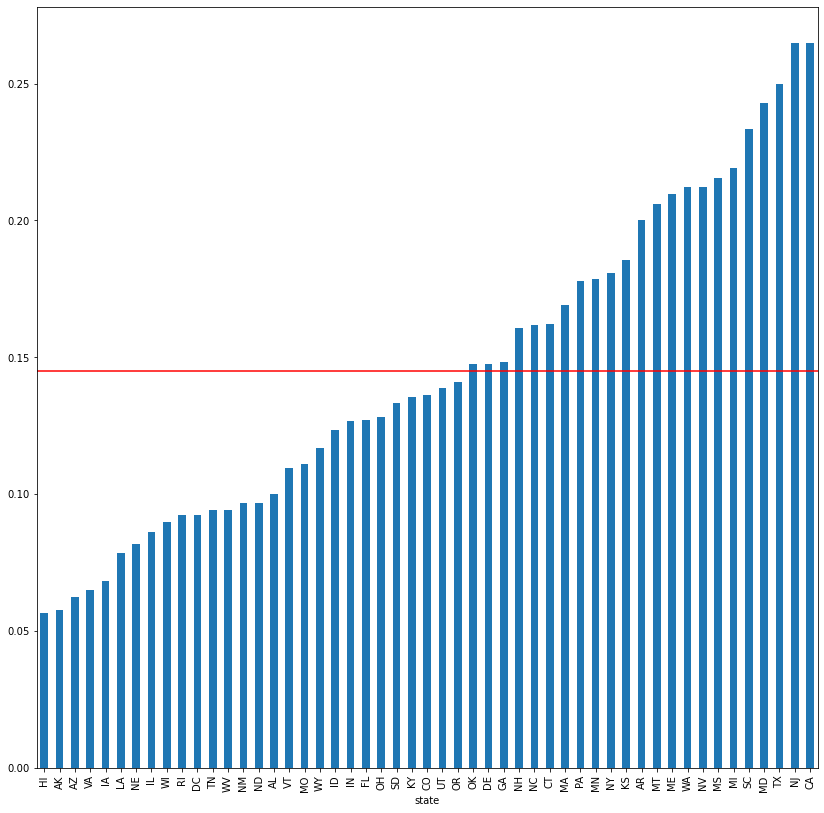

In [109]:
gb = df.groupby(['state'])['churn'].mean()
gb.sort_values().plot(kind='bar', figsize=(14,14))
plt.axhline(y=gb.mean(), color='r', linestyle='-')

In [111]:
states_df.corr()

,value_count,churn
value_count,1.000000,-0.001216
churn,-0.001216,1.000000


In [114]:
df = df.drop('state', axis=1)

In [115]:
df.to_csv('data_clean.csv')

## Modeling
---

## Evaluation
---

## Conclusion
---

## Future Research
---